<a href="https://colab.research.google.com/github/HeetvDhandhukia/OIBSIP/blob/main/Task2_CarPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('car data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
data=data.dropna()

In [29]:
data = pd.get_dummies(data, columns=['Fuel_Type', 'Selling_type', 'Transmission'])

In [30]:
X = data[['Year', 'Present_Price', 'Driven_kms','Fuel_Type_Diesel', 'Fuel_Type_Petrol','Owner']]
y = data['Selling_Price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
y_pred = model.predict(X_test)

In [34]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.7786618796721319
R-squared: 0.9661974334106317


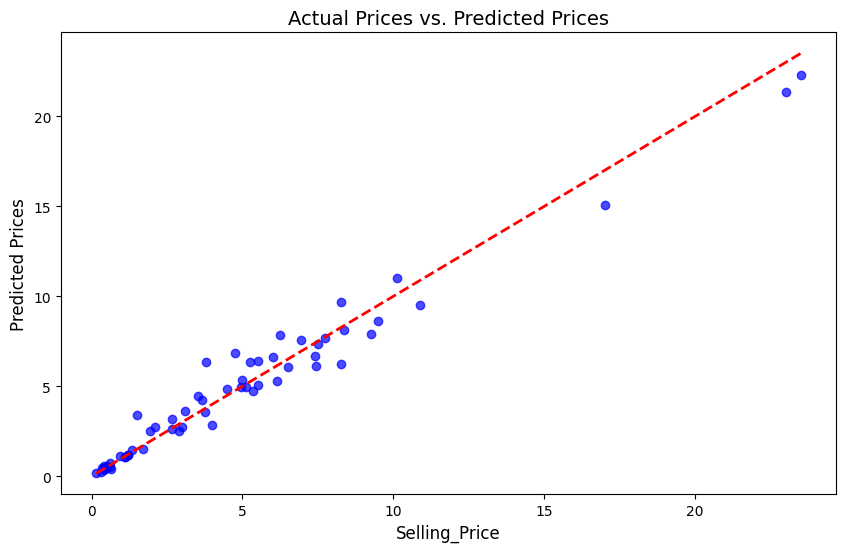

In [36]:
import matplotlib.pyplot as plt

# Scatter plot for predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Selling_Price', fontsize=12)
plt.ylabel('Predicted Prices', fontsize=12)
plt.title('Actual Prices vs. Predicted Prices', fontsize=14)
plt.show()
